# 📘 Capstone Project: Analisis Historis Harga Bitcoin
# Google Colab Notebook Template

# ================================
# 📦 1. Setup & Import Library
# ================================

In [ ]:
!pip install langchain_community
!pip install replicate
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from langchain_community.llms import Replicate

# ================================
# 🔐 2. Konfigurasi API Replicate
# ================================

In [3]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "temperature": 0.7,
        "max_new_tokens": 500
    }
)

# ================================
# 📂 3. Load Data CSV
# ================================

In [6]:
file_path = "/content/Bitcoin_history_data.csv"

df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# ================================
# 📈 4. Visualisasi Tren Harga
# ================================

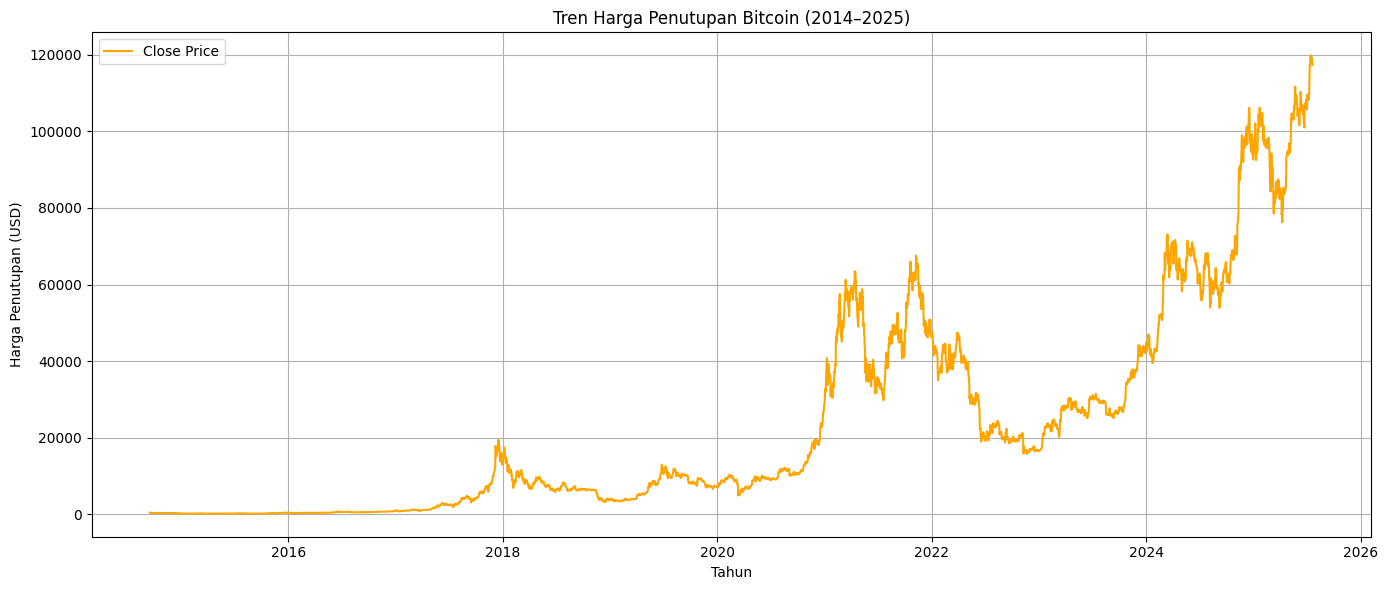

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='orange')
plt.title('Tren Harga Penutupan Bitcoin (2014–2025)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ================================
# 📊 5. Korelasi Volume-Harga
# ================================

Korelasi Volume vs Harga: 0.67


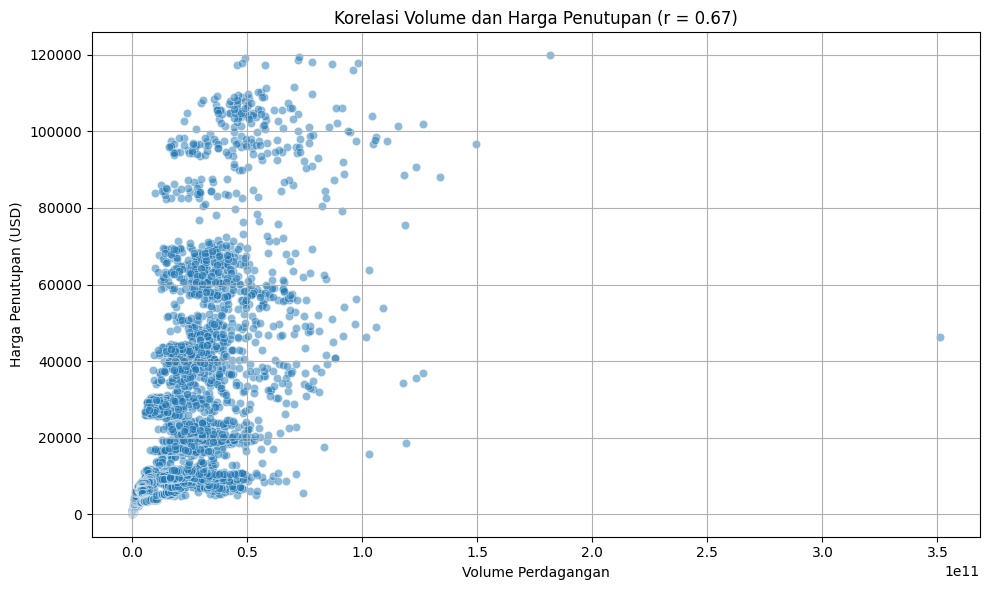

In [8]:
correlation = df[['Volume', 'Close']].corr().iloc[0, 1]
print(f"Korelasi Volume vs Harga: {correlation:.2f}")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Volume', y='Close', alpha=0.5)
plt.title(f'Korelasi Volume dan Harga Penutupan (r = {correlation:.2f})')
plt.xlabel('Volume Perdagangan')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# 🧠 6. Insight via Granite API
# ================================

In [10]:
prompt = """
Saya sedang menganalisis data historis harga Bitcoin dari tahun 2014 hingga 2025. Berikut beberapa hasil analisis saya:

1. Tren harga menunjukkan pola siklus: naik signifikan di 2017, 2021, dan kembali naik lagi di 2024-2025.
2. Kenaikan harga besar biasanya diikuti koreksi tajam, lalu stabil.
3. Korelasi antara volume perdagangan dan harga cukup tinggi (Pearson = 0.67), menunjukkan aktivitas pasar sangat memengaruhi harga.

Berdasarkan insight ini, berikan:
- Ringkasan singkat dari pola yang terjadi.
- Rekomendasi untuk calon investor berdasarkan data historis ini.
- Prediksi pola yang mungkin terjadi di masa depan berdasarkan data tersebut.
Tuliskan dalam bahasa yang mudah dimengerti oleh orang umum.
"""

response = model.invoke(prompt)
print(response)

Ringkasan pola harga Bitcoin dari 2014 hingga 2025:

1. **Siklus naik-turun**: Harga Bitcoin bergerak secara teratur dengan pola siklus, menunjukkan kenaikan signifikan pada tahun 2017, 2021, dan masih naik pada 2024-2025.
2. **Koreksi tajam**: Setelah kenaikan harga yang besar, biasanya akan ada koreksi tajam, diikuti stabilitas harga.
3. **Volume perdagangan**: Volume perdagangan Bitcoin kuat korrelasi dengan harga (korelasi Pearson = 0.67), jadi aktivitas perdagangan yang tinggi seringkali mengarah pada kenaikan harga.

Rekomendasi untuk calon investor:

Berdasarkan data historis, berikut adalah rekomendasi untuk calon investor:

1. **Hadirkan risiko tinggi**: Bitcoin mengalami volatilitas yang sangat tinggi, sehingga investasi ini membutuhkan toleransi risiko yang tinggi.
2. **Penting untuk memahami siklus**: Siklus naik-turun dan kenaikan-koreksi mungkin membantu dalam memahami tren harga, namun faktor unik dan sifat pasar alternatif harus dipertimbangkan.
3. **Fokus pada aktivita

# ================================
# 📌 7. Penutup & Rangkuman
# ================================

In [11]:
with open("granite_insight.md", "w") as f:
    f.write(response)